In [1]:
import pandas as pd
import numpy as np
from scipy import fftpack
import time as time
import scipy.signal as sp
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
data_walking1 = pd.read_csv(r'/home/bechorfa/Downloads/motion-sense-master/data/B_Accelerometer_data/wlk_7/sub_21.csv')
data_walking2 = pd.read_csv(r'/home/bechorfa/Downloads/motion-sense-master/data/B_Accelerometer_data/wlk_7/sub_17.csv')
data_walking3 = pd.read_csv(r'/home/bechorfa/Downloads/motion-sense-master/data/B_Accelerometer_data/wlk_7/sub_12.csv')

data_sitting1 = pd.read_csv(r'/home/bechorfa/Downloads/motion-sense-master/data/B_Accelerometer_data/sit_5/sub_11.csv')
data_sitting2 = pd.read_csv(r'/home/bechorfa/Downloads/motion-sense-master/data/B_Accelerometer_data/sit_5/sub_8.csv')
data_sitting3 = pd.read_csv(r'/home/bechorfa/Downloads/motion-sense-master/data/B_Accelerometer_data/sit_5/sub_1.csv')

In [3]:
data_walking1 = data_walking1[['x','y','z']]
data_walking2 = data_walking2[['x','y','z']]
data_walking3 = data_walking3[['x','y','z']]

data_sitting1 = data_sitting1[['x','y','z']]
data_sitting2 = data_sitting2[['x','y','z']]
data_sitting3 = data_sitting3[['x','y','z']]

data_walking1["mag"]=np.sqrt(np.square(data_walking1.iloc[:,1:4]).sum(axis=1))
data_walking2["mag"]=np.sqrt(np.square(data_walking2.iloc[:,1:4]).sum(axis=1))
data_walking3["mag"]=np.sqrt(np.square(data_walking3.iloc[:,1:4]).sum(axis=1))

data_sitting1["mag"]=np.sqrt(np.square(data_sitting1.iloc[:,1:4]).sum(axis=1))
data_sitting2["mag"]=np.sqrt(np.square(data_sitting2.iloc[:,1:4]).sum(axis=1))
data_sitting3["mag"]=np.sqrt(np.square(data_sitting3.iloc[:,1:4]).sum(axis=1))

In [4]:
def sliding_window(elements, window_size, all_windows):
    bound = int(len(elements)/(window_size/2))
    if len(elements) <= window_size:
       return elements
    for i in range(len(elements)):
        if (len(all_windows)==bound):
            break
        all_windows.append(np.array(elements[int(i*window_size/2):int(i*window_size/2)+window_size]))

In [5]:
walking1_mag_windows = []
sliding_window(data_walking1["mag"], 200, walking1_mag_windows)
walking2_mag_windows = []
sliding_window(data_walking2["mag"], 200, walking2_mag_windows)
walking3_mag_windows = []
sliding_window(data_walking3["mag"], 200, walking3_mag_windows)

sitting1_mag_windows = []
sliding_window(data_sitting1["mag"], 200, sitting1_mag_windows)
sitting2_mag_windows = []
sliding_window(data_sitting2["mag"], 200, sitting2_mag_windows)
sitting3_mag_windows = []
sliding_window(data_sitting3["mag"], 200, sitting3_mag_windows)

In [6]:
stds_walking1 = []
stds_walking2 = []
stds_walking3 = []

stds_sitting1 = []
stds_sitting2 = []
stds_sitting3 = []
a = []
for i in range(len(walking1_mag_windows)-2):
    stds_walking1.append(np.std(walking1_mag_windows[i+2]))
for i in range(len(walking2_mag_windows)-2):
    stds_walking2.append(np.std(walking2_mag_windows[i+2]))
for i in range(len(walking3_mag_windows)-2):
    stds_walking3.append(np.std(walking3_mag_windows[i+2]))

for i in range(len(sitting1_mag_windows)-2):
    stds_sitting1.append(np.std(sitting1_mag_windows[i+2]))
for i in range(len(sitting2_mag_windows)-2):
    stds_sitting2.append(np.std(sitting2_mag_windows[i+2]))
for i in range(len(sitting3_mag_windows)-2):
    stds_sitting3.append(np.std(sitting3_mag_windows[i+2]))

    

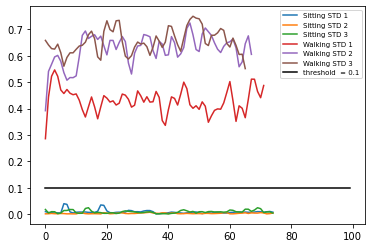

In [7]:
threshold = np.full(
  shape=100,
  fill_value=0.1,
)

plt.plot(stds_sitting1[:75], label = "Sitting STD 1")
plt.plot(stds_sitting2[:75], label = "Sitting STD 2")
plt.plot(stds_sitting3[:75], label = "Sitting STD 3")

plt.plot(stds_walking1[:75], label = "Walking STD 1")
plt.plot(stds_walking2[:75], label = "Walking STD 2")
plt.plot(stds_walking3[:75], label = "Walking STD 3")

plt.plot(threshold, label = "threshold  = 0.1", color="black")

plt.legend(loc='upper right', fontsize="x-small")
plt.show()